In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
df=pd.read_csv("C:\\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\priyadarsani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


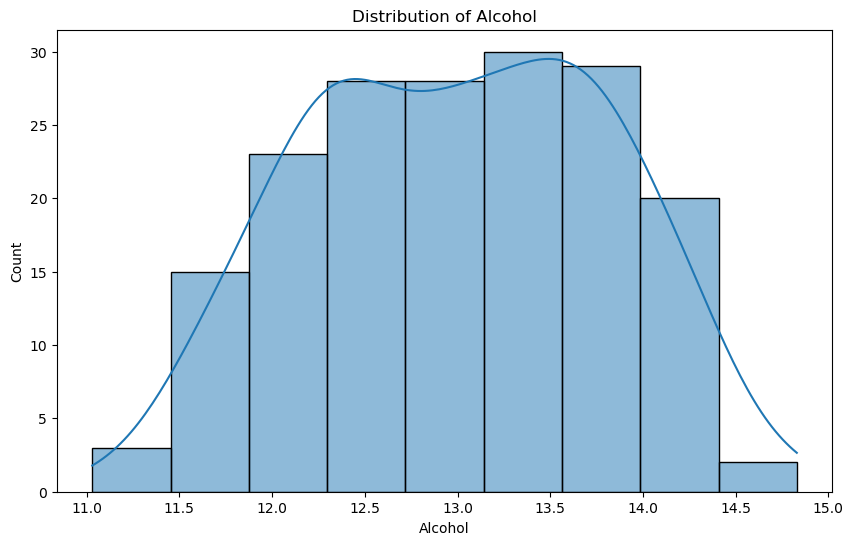

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Alcohol'], kde=True)  # histogram for Alcohol feature
plt.title('Distribution of Alcohol')
plt.show()

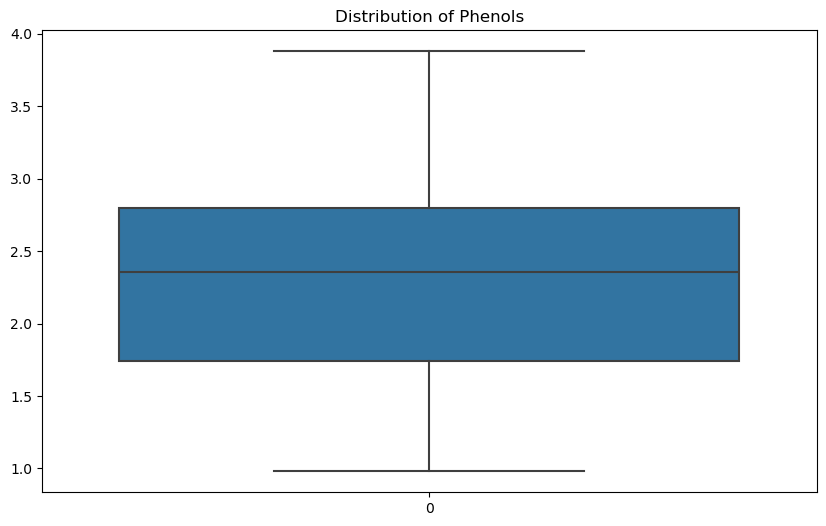

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Phenols'])  # box plot for Phenols feature
plt.title('Distribution of Phenols')
plt.show()

In [8]:
corr_matrix = df.corr()
print(corr_matrix)  # display correlation matrix


                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

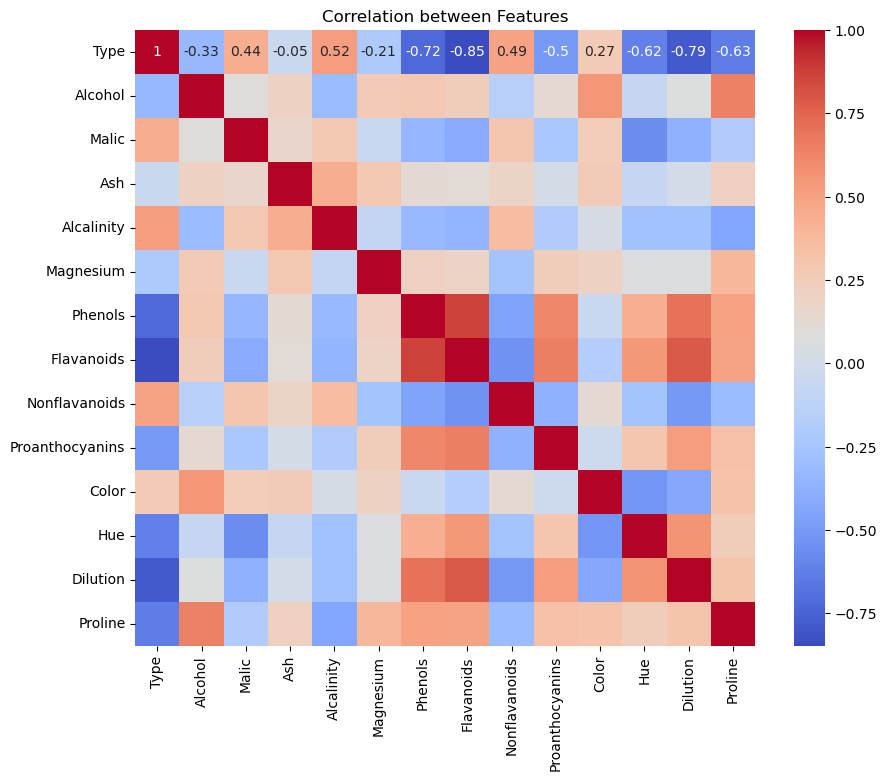

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # heatmap for correlation matrix
plt.title('Correlation between Features')
plt.show()

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca = PCA()
pca_df = pca.fit_transform(df_scaled)

In [12]:
pca_df

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

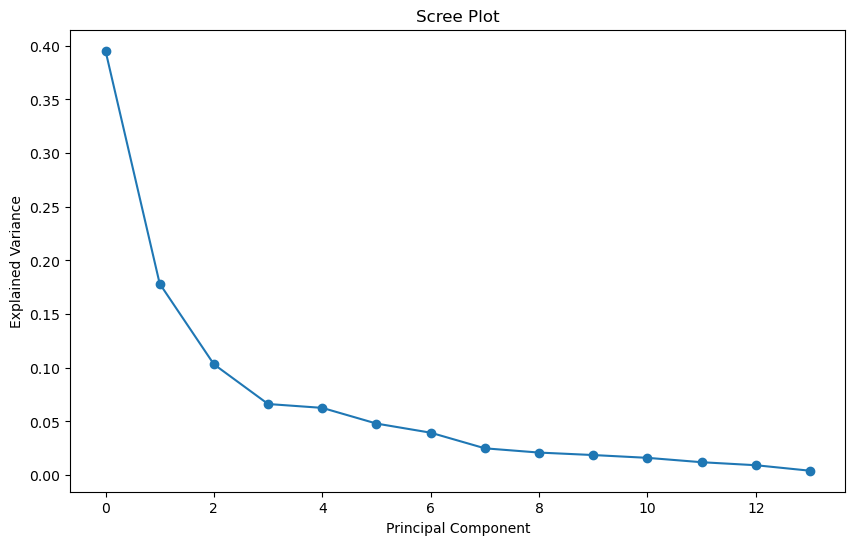

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

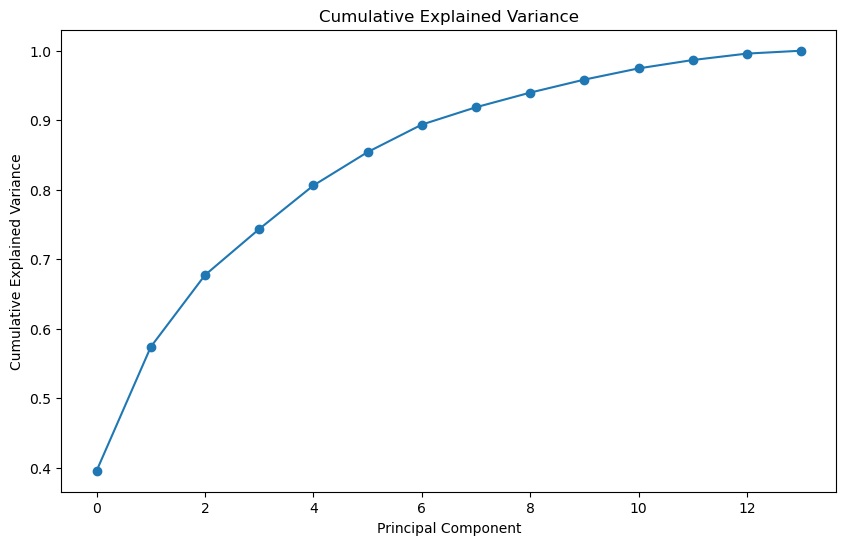

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [15]:
pca_df = pca.transform(df_scaled)

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

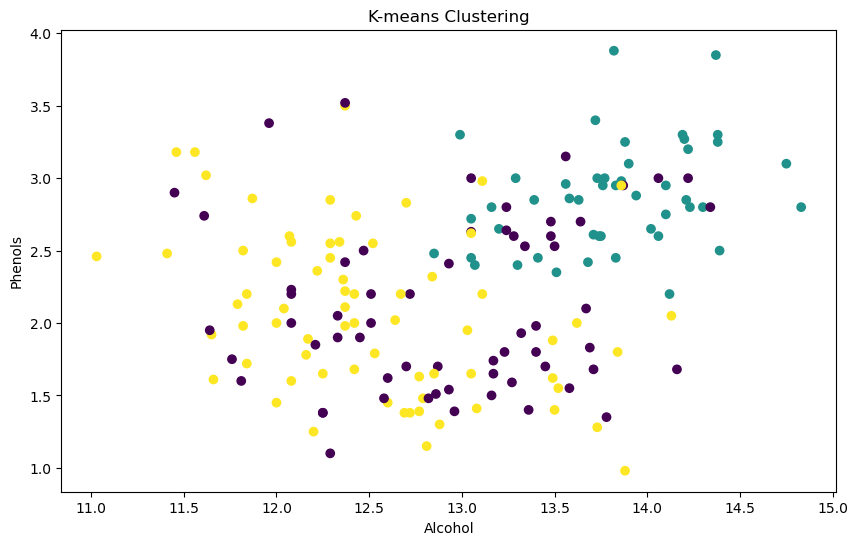

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol'], df['Phenols'], c=kmeans.labels_)
plt.title('K-means Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.show()

In [29]:
silhouette = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5711220218931753


In [30]:
davies_bouldin = davies_bouldin_score(df, kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin)


Davies-Bouldin Index: 0.5342660703679658


In [32]:
pca_kmeans = KMeans(n_clusters=3)
pca_kmeans.fit(pca_df)

C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

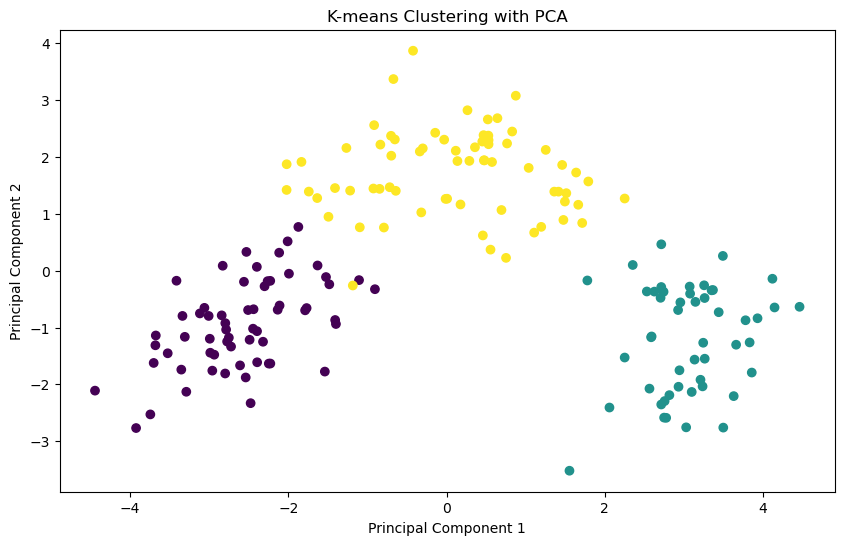

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=pca_kmeans.labels_)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [22]:
# Comparison of Clustering Results
print("Silhouette Score (Original):", silhouette_score(df, kmeans.labels_))
print("Silhouette Score (PCA):", silhouette_score(pca_df, pca_kmeans.labels_))

Silhouette Score (Original): 0.4075269218206884
Silhouette Score (PCA): 0.2699245294251973


In [23]:
print("Davies-Bouldin Index (Original):", davies_bouldin_score(df, kmeans.labels_))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_df, pca_kmeans.labels_))


Davies-Bouldin Index (Original): 0.5308629027985914
Davies-Bouldin Index (PCA): 1.6525648147595953


In [24]:
# Similarities and Differences
print("Cluster Centers (Original):", kmeans.cluster_centers_)
print("Cluster Centers (PCA):", pca_kmeans.cluster_centers_)


Cluster Centers (Original): [[1.00000000e+00 1.36625000e+01 2.34500000e+00 2.55750000e+00
  1.77250000e+01 1.05000000e+02 2.72500000e+00 2.79250000e+00
  2.62500000e-01 1.48250000e+00 4.78000000e+00 9.92500000e-01
  3.06750000e+00 1.09375000e+03]
 [2.75000000e+00 1.26787500e+01 3.09000000e+00 2.33250000e+00
  1.99500000e+01 9.38750000e+01 1.70625000e+00 8.75000000e-01
  4.11250000e-01 1.02125000e+00 4.94000000e+00 7.86250000e-01
  1.90375000e+00 5.19375000e+02]
 [2.50000000e+00 1.25550000e+01 3.45000000e+00 2.19000000e+00
  1.98250000e+01 9.12500000e+01 1.88750000e+00 1.45000000e+00
  4.15000000e-01 1.38000000e+00 4.73750000e+00 9.45000000e-01
  2.21250000e+00 7.17250000e+02]
 [1.00000000e+00 1.37700000e+01 1.90000000e+00 2.68000000e+00
  1.71000000e+01 1.15000000e+02 3.00000000e+00 2.79000000e+00
  3.90000000e-01 1.68000000e+00 6.30000000e+00 1.13000000e+00
  2.93000000e+00 1.37500000e+03]
 [2.16666667e+00 1.25416667e+01 2.34666667e+00 2.22500000e+00
  2.05000000e+01 8.53333333e+01 2.

In [25]:
# Impact of Dimensionality Reduction
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


In [26]:
# Trade-offs between PCA and Original Dataset
print("Original Dataset Shape:", df.shape)
print("PCA-transformed Dataset Shape:", pca_df.shape)


Original Dataset Shape: (178, 14)
PCA-transformed Dataset Shape: (178, 14)
